# Problem Set 7

ECON 526

This problem set uses data from “Long-Term Impacts of Individual
Development Accounts on Homeownership among Baseline Renters: Follow-Up
Evidence from a Randomized Experiment” M. Grinstein-Weiss et al. (2013).
Data is available from S. Grinstein-Weiss Michal and Key (2013). The
data carries a Creative Commons
<a href="http://creativecommons.org/licenses/by/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution
4.0 International
License<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"></a>.

# Question 1

Read the introduction and section I of M. Grinstein-Weiss et al. (2013).
Briefly (1-3 sentences) describe the experiment being studied.

The paper wanted to study the long term impacts of government assistance progarms on homeownership. They did this by studying the homeownership rates of people in Tulsa, OK who were randomly selected to participate in the Individual Development Account (IDA) program. The IDA program was a government assistance program that matched the savings of low-income families to help them purchase a home. The experiment took place between October 1998 to December 1999, the fourth wave of interviews was done between August 2008 to December 2009.

# Question 2

We load the data in a dataframe named `df`.

In [32]:
import pandas as pd
df=pd.read_stata("data/AEJPol-2011-0054_R1_shared_data_file.dta")

The data is not well documented, but from reading the paper and code, I
created the following data dictionary. `datadic["<column name>"]` is
supposed to be the definition of each column.

In [33]:
datadic = {
    'id_abt' : "identifier",
    'id_rti' : "",
    'id_part': "",
    'treat' : "treatment indicator",
    'cohort': "experiment recruitment cohort",
    'sample12': "responded to wave 1 & 2 surveys",
    'sample13': "responded to wave 1 & 3 surveys",
    'sample14': "responded to wave 1 & 4 surveys",
    'sample134' : "responded to wave 1, 3, & 4 surveys",
    'dt_inter_u17' : "wave 1 interview date",
    'dt_inter_u25' : "wave 2 interview date",
    'dt_inter_u33' : "wave 3 interview date",
    'dt_inter_u42' : "wave 4 interview date",
    'female_u17' : "female",
    'race_u17' : "race",
    'race_cau_u17': "whether Caucasian",
    'age_u17' : "age",
    'hh_total_u17' : "number in household",
    'hh_adult_u17' : "number of other adults in household",
    'hh_child_u17' : "number of children",
    'marital_u17' : "marital status",
    'ed_u17' : "education",
    'sat_heal_u17' : "health satisfication",
    'sat_fin2_u17' : "financial satisfication",
    'ins_heal_u17' : "health insurance",
    'src_welf_u17' : "received welfare payments",
    'inc_tot_u17' : "monthly income",
    'own_home_u17': "own home in wave 1",
    'own_home_u25': "own home in wave 2",
    'own_home_u33': "own home in wave 3",
    'own_home_u42': "own home in wave 4",
    'hm_own4_u42': "",
    'hm_byyr1_u42': "Year bought home 1 in wave 4",
    'hm_byyr2_u42' :"Year bought home 2 in wave 4",
    'hm_byyr3_u42': "Year bought home 3 in wave 4",
    'hm_byow1_u42': "Had home 1 in wave 4",
    'hm_byow2_u42': "Had home 2 in wave 4",
    'hm_byow3_u42': "Had home 3 in wave 4",
    'hm_forc1_u42': "Home 1 foreclosed",
    'hm_forc2_u42': "Home 2 foreclosed",
    'hm_lvyr1_u42': "Year left home 1 in wave 4",
    'hm_lvyr2_u42': "Year left home 2 in wave 4",
    'hm_lvyr3_u42': "Year left home 3 in wave 4",
    'ass_home_u42': "", 'owe_home_u42': "", 'mt_year1_u42': "", 'mt_debt1_u42': "", 'lib_home_u42': "",
    'mt_pymt1_u42': "", 'mt_fix1_u42': "", 'mt_int1_u42': "", 'mt_30_u42': "", 'mt_90_u42': "",
    'pub_home_u17': "public housing in wave 1",
    'section8_u17': "section 8 rental assistance in wave 1",
    'own_car_u17': "owned car in wave 1",
    'own_prop_u17': "own other property",
    'own_bus_u17': "owned business in wave 1",
    'own_ira_u17': "own IRA in wave 1",
    'own_bank_u17': "have a bank account in wave 1",
    'ass_tot_u17': "assets in wave 1",
    'lib_tot_u17': "", 'cap_soc_u25': "", 'cap_soc_u33': "", 'cap_work_u25': "",
    'cap_work_u33': "", 'cap_med_u25': "", 'cap_med_u33': "", 'cap_kid_u25': "",
    'cap_kid_u33': "", 'cap_ceo_u25': "", 'cap_ceo_u33': "", 'cap_home_u25': "",
    'cap_home_u33': "", 'cap_ed_u25': "", 'cap_ed_u33': "", 'cap_tax_u25': "",
    'cap_tax_u33': "", 'mis_plan_u42': "", 'mis_g_u42': "", 'gt_scale_u17': "", 'miss_gt': "",
    'gv_scale_u17': "", 'miss_gv': "", 'own_scale_u17': "", 'miss_own': "", 'ci_scale_u17': "",
    'miss_ci': "", 'str_scale_u17': "", 'miss_str': "", 'inv_treat': "", 'crossover_23': "",
    'crossover_234': "", 'mis_match_u42': ""
}

Report unadjusted estimates of the average treatment effect of the
program after waves 2, 3, and 4.

In [34]:
import statsmodels.formula.api as smf
# your code here
# look at the mean by treatment status of df.own_home_u25 and similar variables
# use smf.ols() to get standard errors

waves = ["own_home_u25" , "own_home_u33" , "own_home_u42"]

temp_df = df
temp_df = temp_df.replace({'yes': 1, 'no': 0, 'Control': 0, 'Treatment': 1})
temp_df['treat'] = pd.to_numeric(temp_df['treat'], errors='coerce')
temp_df['treated'] = temp_df['treat'] * 1

for i, wave in enumerate(waves):
    temp_df[wave] = pd.to_numeric(temp_df[wave], errors='coerce')
    temp_df[f'wave{i+1}'] = temp_df[wave] * 1
    
    result = smf.ols(f'wave{i+1} ~ treated', data=temp_df).fit()
    print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1620      0.019      8.484      0.000       0.125       0.200
treated       -0.0160      0.027     -0.595      0.552      -0.069       0.037
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2786      0.026     10.820      0.000       0.228       0.329
treated        0.0673      0.037      1.840      0.066      -0.005       0.139
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4260      0.027     15.597      0.000       0.372       0.480
treated        0.0271      0.039      0.697      0.486      -0.049       0.104


# Question 3

Treatment was assigned randomly in wave 1, but not everyone responded to
later surveys.

## Q3.1

Report the difference in average monthly income at wave 1 between the
treatment and control group for everyone in the data, everyone
responding to waves 1 and 2, everyone responding to waves 1 and 3, and
everyone responding to waves 1 and 4. Also include standard errors for
the differences.

*Hint: Monthly income is `inc_tot_u17`. Being in waves 1 and X is
`sample1X`.*

In [35]:
# your code here

waves = ["sample12" , "sample13" , "sample14"]

result = smf.ols('inc_tot_u17 ~ treated', data=temp_df).fit()
print(result.summary().tables[1])

for wave in waves:
    temp_df[wave] = pd.to_numeric(temp_df[wave], errors='coerce')
    temp_df[f'wave{i+1}'] = temp_df[wave] * 1

    sample =temp_df[temp_df[wave] == 1]
    
    result = smf.ols('inc_tot_u17 ~ treated', data=sample).fit()
    print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1323.9324     35.444     37.353      0.000    1254.361    1393.503
treated      108.6085     50.065      2.169      0.030      10.339     206.878
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1317.1214     38.255     34.430      0.000    1242.013    1392.230
treated      121.3928     53.870      2.253      0.025      15.626     227.159
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1329.4968     39.797     33.407      0.000    1251.343    1407.650
treated      123.7451     56.372      2.195      0.029      13.041     234.449
                 coef    std err          t      P>|

## Q3.2

Why might treatment be related potential outcomes conditional a
responding to a later survey?

People who have undergone treatment may be more likely to repsond to a later survey if they have had a positive outcome from the treatment. For example, if the treatment was effective in helping them purchase a home, they may be more likely to respond to a later survey to report that they have purchased a home. If a negative outcome occured, they may be less likely to respond to a later survey.

# Question 4

## Q4.1

Use a flexible model to estimate the propensity score. Include only
pretreatment variables (i.e. variables recorded in wave 1) when
estimating the propensity score.

In [36]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LassoCV
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
# your code here

variables = ['treat',
    'pub_home_u17',
    'section8_u17',
    'own_car_u17',
    'own_prop_u17',
    'own_bus_u17',
    'own_ira_u17',
    'own_bank_u17',
    'ass_tot_u17', 
    'female_u17',
    'race_u17',
    'race_cau_u17',
    'age_u17',
    'hh_total_u17',
    'hh_adult_u17',
    'hh_child_u17',
    'marital_u17',
    'ed_u17',
    'sat_heal_u17',
    'sat_fin2_u17',
    'ins_heal_u17',
    'src_welf_u17',
    'inc_tot_u17',
    'own_home_u17']

df = df.replace({'yes': 1, 'no': 0, 'Control' : 0, 'Treatment': 1, 'female' : 1, 'male': 0})

X = pd.get_dummies(df[variables].drop('treat', axis=1), drop_first=True)
X = X.fillna(0)
T = df['treat']

model = LogisticRegression(solver='liblinear')
model = model.fit(X, T)

propensity_scores = model.predict_proba(X)[:, 1]

print(propensity_scores)

[0.48364597 0.4844886  0.63525163 0.51058049 0.6959942  0.50907906
 0.64159123 0.46671848 0.39199759 0.48488237 0.4594518  0.42819314
 0.34279721 0.21870339 0.4506224  0.65009588 0.47031252 0.58162347
 0.49969123 0.54196635 0.65383715 0.64977365 0.56315145 0.53172729
 0.44552126 0.26114041 0.61923595 0.66851619 0.539055   0.49282467
 0.31309328 0.65200452 0.65202261 0.33032031 0.45984806 0.66552909
 0.43987724 0.46477798 0.35960683 0.56301755 0.65945074 0.53805636
 0.54534361 0.50422071 0.51089363 0.52439694 0.44357261 0.46425128
 0.45267509 0.43238956 0.50317418 0.52000711 0.56137418 0.69925403
 0.54691667 0.6049566  0.59208744 0.46026549 0.54918715 0.31959996
 0.51162268 0.54291966 0.50579557 0.37158048 0.40375527 0.41407846
 0.4813073  0.64670318 0.5143713  0.39819764 0.387563   0.50633378
 0.74251921 0.40400696 0.51201418 0.44646094 0.60742025 0.46779097
 0.49364818 0.48511267 0.50929304 0.53489342 0.52209764 0.59816425
 0.58784984 0.38692311 0.42091039 0.43886696 0.46184101 0.5456

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


## Q4.2

Check for overlap by plotting histograms of estimated propensity scores
conditional on treatment status.

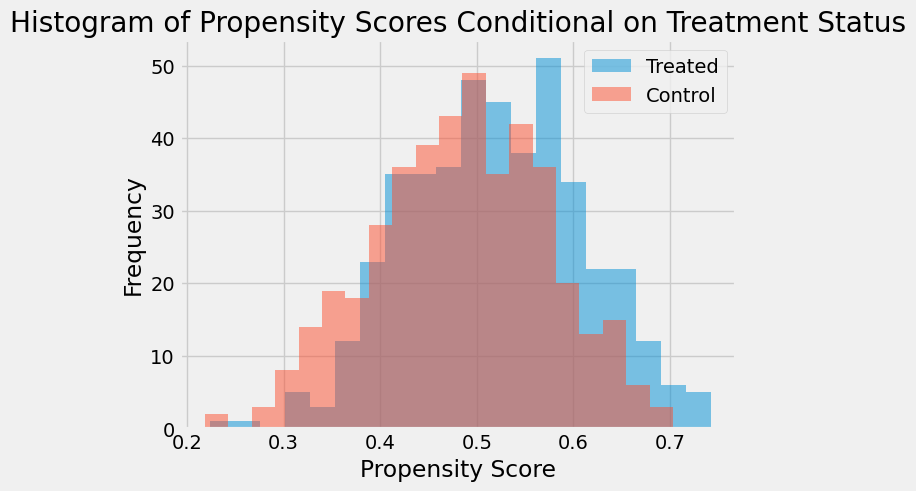

In [37]:
from matplotlib import style
from matplotlib import pyplot as plt
style.use("fivethirtyeight") # or whatever you prefer
# your code here

df['propensity_scores'] = propensity_scores

treated = df[df['treat'] == 1]['propensity_scores']
control = df[df['treat'] == 0]['propensity_scores']

plt.hist(treated, bins=20, alpha=0.5, label='Treated')
plt.hist(control, bins=20, alpha=0.5, label='Control')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Propensity Scores Conditional on Treatment Status')
plt.legend(loc='upper right')
plt.show()

# Question 5

## Q5.1

Compute a doubly robust estimates of the effect of the treatment on home
ownership at waves 2-4 (3 separate estimates). Report estimates and
confidence intervals.

In [38]:
from econml.dr import LinearDRLearner
# your code here

results = {}

waves = ["own_home_u25" , "own_home_u33" , "own_home_u42"]
samples = ["sample12" , "sample13" , "sample14"]

for i, wave in enumerate(waves):
    temp_df = df[df[samples[i]] == 1]

    y = temp_df[wave]
    y = y.replace({'yes': 1, 'no': 0})
    y = y.fillna(0)

    T = temp_df['treat']

    X = pd.get_dummies(temp_df[variables].drop('treat', axis=1), drop_first=True)
    X = X.fillna(0)

    est = LinearDRLearner(#featurizer=PolynomialFeatures(degree=20, include_bias=False),
                    model_regression=LassoCV(),
                    model_propensity=LogisticRegressionCV(),
                    cv=20)
    est.fit(y, T, X=None, W=X)
    point = est.const_marginal_effect(None)
    lb, ub = est.const_marginal_effect_interval(None, alpha=0.05)
    results[wave] = {'point': point[0], 'lb': lb[0], 'ub': ub[0]}

results = pd.DataFrame(results).T
print(results)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
lbfgs failed to converge (stat

                               point                       lb  \
own_home_u25  [-0.02359491537494124]   [-0.07636214867113603]   
own_home_u33   [0.05838235985170977]  [-0.013150292901524266]   
own_home_u42   [0.02289373163760532]   [-0.05430364897346586]   

                                  ub  
own_home_u25  [0.029172317921253535]  
own_home_u33   [0.12991501260494379]  
own_home_u42   [0.10009111224867648]  


## Q5.2

Create a plot of your estimated treatment effects by wave with
confidence intervals.

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


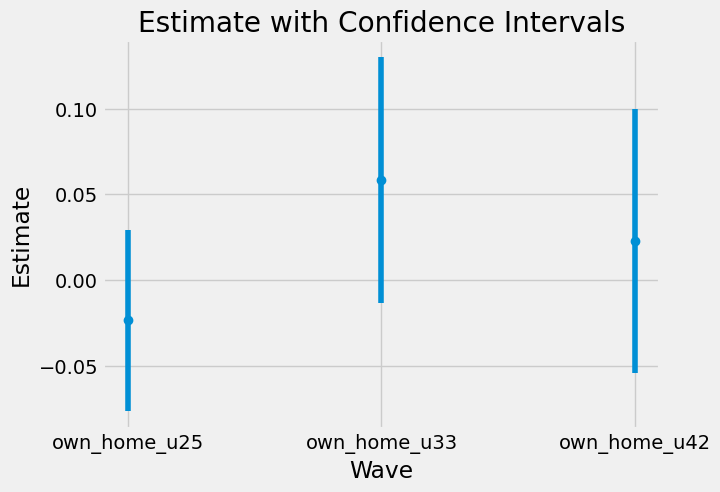

In [39]:
# your code here
results = results.values
wave = waves
point = results[:, 0].astype(float)
lb = results[:, 1].astype(float)
ub = results[:, 2].astype(float)

yerr = [point - lb, ub - point]

plt.errorbar(wave, point, yerr=yerr, fmt='o')
plt.xlabel('Wave')
plt.ylabel('Estimate')
plt.title('Estimate with Confidence Intervals')
plt.show()

## Q5.3

Compare your estimates to those in table 4 and figure 1 of M.
Grinstein-Weiss et al. (2013).

Compared to the pap, the results obtained here are very similar. The results here are slightly lower than those in the paper, but the confidence intervals overlap.

# References

Grinstein-Weiss, Michal, Michael Sherraden, William G. Gale, William M.
Rohe, Mark Schreiner, and Clinton Key. 2013. “Long-Term Impacts of
Individual Development Accounts on Homeownership Among Baseline Renters:
Follow-up Evidence from a Randomized Experiment.” *American Economic
Journal: Economic Policy* 5 (1): 122–45.
<https://doi.org/10.1257/pol.5.1.122>.

Grinstein-Weiss, Sherraden, Michal, and Clinton Key. 2013. “Replication
Data for: Long-Term Impacts of Individual Development Accounts on
Homeownership Among Baseline Renters: Follow-up Evidence from a
Randomized Experiment.” American Economic Association.
<https://doi.org/10.3886/E116540V1>.